In [32]:
import seaborn
import pandas as pd
import numpy as np

from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Panel
from bokeh.models.widgets import Tabs

In [43]:
datatype = 'users'

t1_to_atlas_reg = pd.read_csv('../data/db-t1_to_atlas_reg/db-t1_to_atlas_reg_' + datatype + '.csv')
func_to_t1_reg = pd.read_csv('../data/db-func_to_t1_reg/db-func_to_t1_reg_' + datatype + '.csv')
surfaces = pd.read_csv('../data/db-surfaces/db-surfaces_' + datatype + '.csv')

df = t1_to_atlas_reg


In [41]:
df.head()

,user,sample,count
0,user_0000,gold_subject_000008_t1_in_atlas_copy2,1
1,user_0000,gold_subject_000008_t1_in_atlas_copy3,1
2,user_0000,gold_subject_000018_t1_in_atlas_copy3,1
3,user_0000,gold_subject_000023_t1_in_atlas_copy2,1
4,user_0000,gold_subject_000030_t1_in_atlas_copy2,1


In [22]:
df.score.head()

0    1072
1     329
2       4
3       0
4       5
Name: score, dtype: int64

In [16]:
df.sort_values('score',ascending=False).head(10)

,user,admin,consent,level,score,taken_tutorial
63,user_0063,False,True,6.0,3113,True
44,user_0044,False,True,6.0,2642,True
65,user_0065,False,True,6.0,2536,True
25,user_0025,False,True,6.0,2020,True
21,user_0021,False,True,6.0,2019,True
51,user_0051,False,True,5.0,1857,True
64,user_0064,False,True,5.0,1535,True
6,user_0006,False,True,5.0,1501,True
26,user_0026,False,True,5.0,1501,True
41,user_0041,False,True,4.0,1167,True


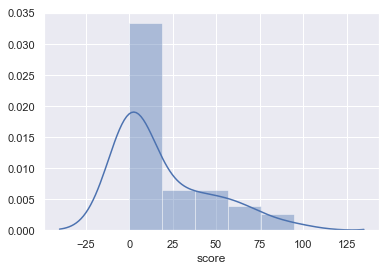

In [23]:
seaborn.set()
axis = seaborn.distplot( df.score[df.score<100] )

In [24]:
class BokehHistogram():

    def __init__(self, colors=["SteelBlue", "Tan"], height=600, width=600):
        self.colors = colors
        self.height = height
        self.width = width

    def hist_hover(self, dataframe, column, bins=30, log_scale=False, show_plot=True):
        hist, edges = np.histogram(dataframe[column], bins = bins)
        hist_df = pd.DataFrame({column: hist,
                                 "left": edges[:-1],
                                 "right": edges[1:]})
        hist_df["interval"] = ["%d to %d" % (left, right) for left, 
                               right in zip(hist_df["left"], hist_df["right"])]

        if log_scale == True:
            hist_df["log"] = np.log(hist_df[column])
            src = ColumnDataSource(hist_df)
            plot = figure(plot_height = self.height, plot_width = self.width,
                  title = "Histogram of {}".format(column.capitalize()),
                  x_axis_label = column.capitalize(),
                  y_axis_label = "Log Count")    
            plot.quad(bottom = 0, top = "log",left = "left", 
                right = "right", source = src, fill_color = self.colors[0], 
                line_color = "black", fill_alpha = 0.7,
                hover_fill_alpha = 1.0, hover_fill_color = self.colors[1])
        else:
            src = ColumnDataSource(hist_df)
            plot = figure(plot_height = self.height, plot_width = self.width,
                  title = "Histogram of {}".format(column.capitalize()),
                  x_axis_label = column.capitalize(),
                  y_axis_label = "Count")    
            plot.quad(bottom = 0, top = column,left = "left", 
                right = "right", source = src, fill_color = self.colors[0], 
                line_color = "black", fill_alpha = 0.7,
                hover_fill_alpha = 1.0, hover_fill_color = self.colors[1])

        hover = HoverTool(tooltips = [('Interval', '@interval'),
                                  ('Count', str("@" + column))])
        plot.add_tools(hover)

        if show_plot == True:
            show(plot)
        else:
            return plot

    def histotabs(self, dataframe, features, log_scale=False, show_plot=False):
        hists = []
        for f in features:
            h = self.hist_hover(dataframe, f, log_scale=log_scale, show_plot=show_plot)
            p = Panel(child=h, title=f.capitalize())
            hists.append(p)
        t = Tabs(tabs=hists)
        show(t)

    def filtered_histotabs(self, dataframe, feature, filter_feature, log_scale=False, show_plot=False):
        hists = []
        for col in dataframe[filter_feature].unique():
            sub_df = dataframe[dataframe[filter_feature] == col]
            histo = self.hist_hover(sub_df, feature, log_scale=log_scale, show_plot=show_plot)
            p = Panel(child = histo, title=col)
            hists.append(p)
        t = Tabs(tabs=hists)
        show(t)
        

In [44]:
h = BokehHistogram()

h.hist_hover(df, 'score')
# h.histotabs(df, ['user', 'score'])
